In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
import os  

def is_even(num) -> bool: 
    return num % 2 == 0 

def is_odd(num) -> bool: 
    return num % 2 != 0 

In [3]:

def i_file_read(path: str): 
    with open(path, 'rb') as f:
        data = np.fromfile(f, dtype=np.int16).astype(np.float32) 

    I = data[0::2]
    Q = data[1::2]

    return I, Q
print(os.getcwd())
I, Q = i_file_read('./qpsk_signal_noise.bin') 

print(I)
print(Q)

/home/dmitry/Документы/github/sdr-dsp-playground
[ 61. 208. 118. ... 327. 160. -70.]
[ 164.  -38. -254. ... -187.  -35. -111.]


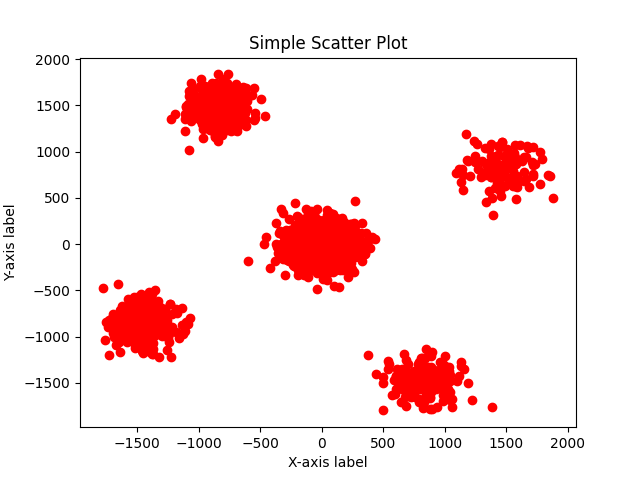

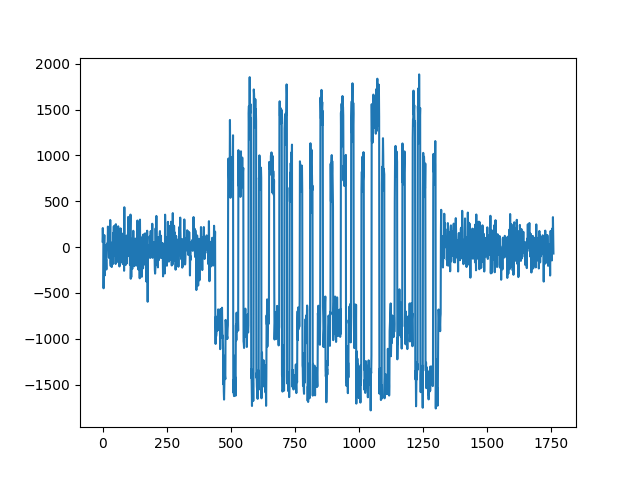

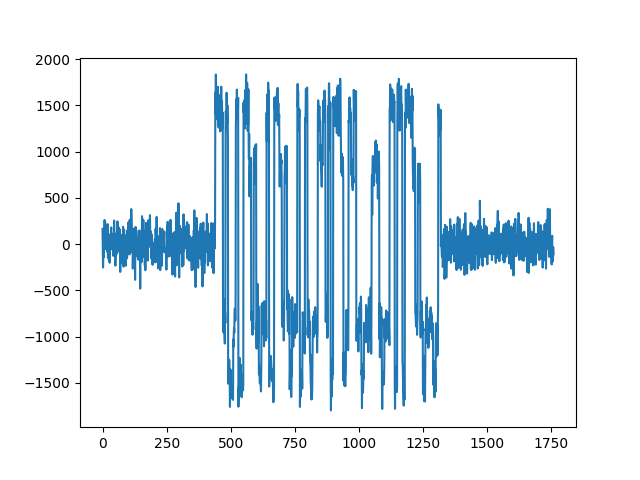

In [4]:
def i_q_visio(): 
    fig, ax = plt.subplots()

    ax.scatter(I, Q, label='Scatter plot', color='red')

    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')
    ax.set_title('Simple Scatter Plot')

    fig1, ax = plt.subplots()

    #ax.plot(I, Q, label='Scatter plot', color='red')
    ax.plot(I)

    # ax.set_xlabel('X-axis label')
    # ax.set_ylabel('Y-axis label')
    # ax.set_title('Simple Scatter Plot')
    # ax.legend()

    fig2, ax2 = plt.subplots()

    #ax.plot(I, Q, label='Scatter plot', color='red')
    ax2.plot(Q)

    # ax2.set_xlabel('X-axis label')
    # ax2.set_ylabel('Y-axis label')
    # ax2.set_title('Simple Scatter Plot')
    # ax2.legend()
i_q_visio()



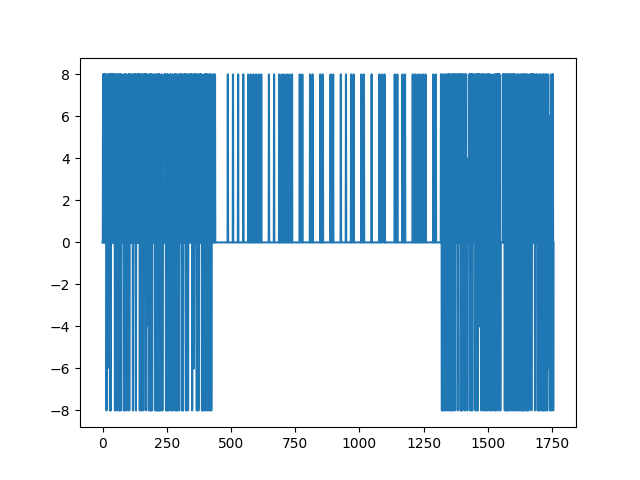

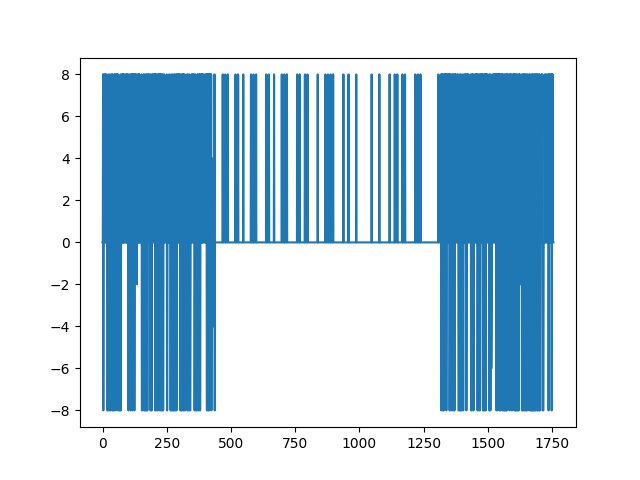

In [5]:
I = np.nan_to_num(I, nan=0.0, posinf=1.0, neginf=-1.0)
Q = np.nan_to_num(Q, nan=0.0, posinf=1.0, neginf=-1.0)

I = np.clip(I, -2, 2)
Q = np.clip(Q, -2, 2)


def gardner_timing_error_qpsk(I, Q):
    errors_i = []
    errors_q = []
    for n in range(1, len(I) - 2):
        I_n, I_n_half, I_n_minus_T = I[n], I[n - 1], I[n + 1]
        Q_n, Q_n_half, Q_n_minus_T = Q[n], Q[n - 1], Q[n + 1]

        # Ошибка Гарднера
        error_I = I_n_half * (I_n - I_n_minus_T)
        error_Q = Q_n_half * (Q_n - Q_n_minus_T)
        errors_i.append(error_I) 
        errors_q.append(error_Q) 

    return np.array(errors_i), np.array(errors_q)

Ierr, Qerr = gardner_timing_error_qpsk(I, Q)

fig3, ax = plt.subplots()
ax.plot(Ierr)

fig3, ax = plt.subplots()
ax.plot(Qerr)

This is a display math example:
$$
\int_0^\infty e^{-x^2} dx = \frac{\sqrt{\pi}}{2}
$$

$$
T_{symb}
$$


In [ ]:
tau_symb = 10   
def match_filter():   
    ones = np.ones(tau_symb) / tau_symb 

    I_convd = np.convolve(I, ones, mode="full") 
    Q_convd = np.convolve(Q, ones, mode="full") 
    
    fig_i, ax = plt.subplots() 

    ax.plot(I_convd) 

    fig_q, ax = plt.subplots() 

    ax.plot(Q_convd)
    
match_filter()
    

In [7]:
def qpsk_modulate(v_bits): 
    S = np.array(); 
    for i in range(len(v_bits)):
        bit = v_bits[i] 

        if (bit == 0): 
            bit = -1
        else: 
            bit = 1 

        if (is_even(i)): # I 
            S.append(bit * np.cos() )
        #if (is_odd(i)):  # Q 
